In [ ]:
!pip install easyocr

Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from pylab import rcParams
from IPython.display import Image

In [ ]:
rcParams['figure.figsize'] = 8, 16

mr= Marathi,
hi= Hindi,
en= English
Models are getting loaded to read 3 languages

In [ ]:
reader = easyocr.Reader(['mr','hi','en'])

Filename is getting set


In [ ]:
file_name = "Capture.JPG"

Tried removing watermark to increase readability for OCR

<class 'numpy.ndarray'>
<class 'PIL.Image.Image'>


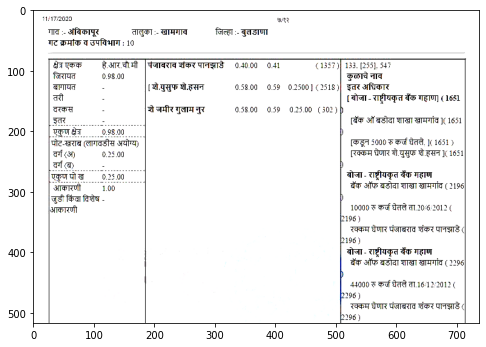

In [ ]:
import cv2
image = cv2.imread(file_name)
print(type(image))
plt.imshow(image)

#tweaking with contrast and brightness to remove watermark
import numpy as np

alpha = 4.0
beta = -400
new = alpha * image + beta
new = np.clip(new, 0, 255).astype(np.uint8)
plt.imshow(new)

from PIL import Image
new_image = Image.fromarray(new)
print(type(new_image))
new_image.save("new.jpg")

First attempt at reading data

In [ ]:
output = reader.readtext("Capture.JPG", detail=1, text_threshold=0.1, paragraph=False, add_margin=0.2)

Second attempt at reading data


In [ ]:
newOutput = reader.readtext("Capture.JPG", detail=1, text_threshold=0.5, paragraph=False, low_text=0.18, add_margin=0.1,height_ths=0.8,mag_ratio=0.85)

In [ ]:
output

[([[14, 8], [68, 8], [68, 22], [14, 22]], '11/17!2020', 0.6685842275619507),
 ([[402, 10], [426, 10], [426, 26], [402, 26]], '७ १२', 0.6132725477218628),
 ([[298.21114561800016, 22.422291236000337],
   [338.8614535721131, 29.9563638994289],
   [334.78885438199984, 49.57770876399967],
   [294.1385464278869, 42.0436361005711]],
  'जिल्हा :',
  0.1733076423406601),
 ([[54, 25], [113, 25], [113, 49], [54, 49]], 'अंबिकापूर', 0.1326557993888855),
 ([[24, 30], [48, 30], [48, 44], [24, 44]], 'गाव', 0.5564720630645752),
 ([[162, 30], [202, 30], [202, 48], [162, 48]], 'तालुका ', 0.2852241098880768),
 ([[210, 30], [258, 30], [258, 46], [210, 46]], 'खामगाव', 0.7653355002403259),
 ([[342, 30], [392, 30], [392, 48], [342, 48]],
  'बुलडाणा',
  0.38419127464294434),
 ([[90, 41], [173, 41], [173, 65], [90, 65]],
  'उपविभाग : १०',
  0.47706615924835205),
 ([[21, 43], [85, 43], [85, 65], [21, 65]], 'गट क्रमाक', 0.21917912364006042),
 ([[187, 80], [319, 80], [319, 104], [187, 104]],
  'पजाबराव शकर पानझाडे

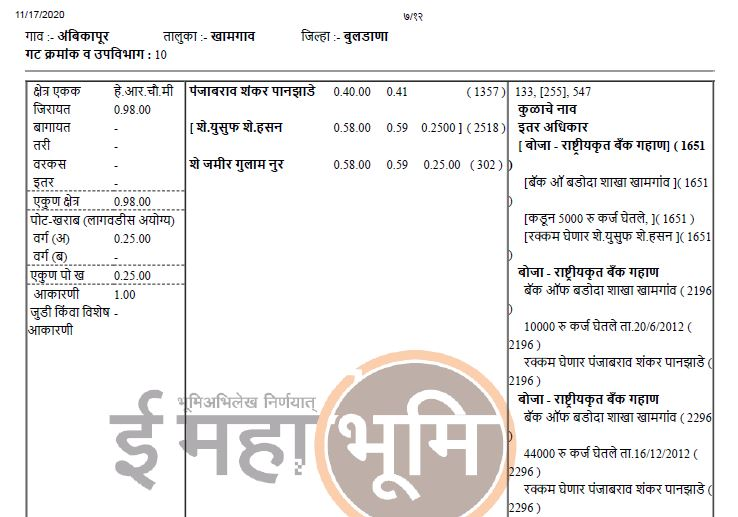

In [ ]:
Image("Capture.JPG")

In [ ]:

help(reader.readtext)

Help on method readtext in module easyocr.easyocr:

readtext(image, decoder='greedy', beamWidth=5, batch_size=1, workers=0, allowlist=None, blocklist=None, detail=1, paragraph=False, min_size=20, contrast_ths=0.1, adjust_contrast=0.5, filter_ths=0.003, text_threshold=0.7, low_text=0.4, link_threshold=0.4, canvas_size=2560, mag_ratio=1.0, slope_ths=0.1, ycenter_ths=0.5, height_ths=0.5, width_ths=0.5, add_margin=0.1) method of easyocr.easyocr.Reader instance
    Parameters:
    image: file path or numpy-array or a byte stream object



In [ ]:
help(reader)

Help on Reader in module easyocr.easyocr object:

class Reader(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, lang_list, gpu=True, model_storage_directory=None, download_enabled=True, detector=True, recognizer=True)
 |      Create an EasyOCR Reader.
 |      
 |      Parameters:
 |          lang_list (list): Language codes (ISO 639) for languages to be recognized during analysis.
 |      
 |          gpu (bool): Enable GPU support (default)
 |      
 |          model_storage_directory (string): Path to directory for model data. If not specified,
 |          models will be read from a directory as defined by the environment variable
 |          EASYOCR_MODULE_PATH (preferred), MODULE_PATH (if defined), or ~/.EasyOCR/.
 |      
 |          download_enabled (bool): Enabled downloading of model data via HTTP (default).
 |  
 |  detect(self, img, min_size=20, text_threshold=0.7, low_text=0.4, link_threshold=0.4, canvas_size=2560, mag_ratio=1.0, slope_ths=0.1, ycenter_ths=

In [ ]:
class TextCoordinates:
  def __init__(self, x1, y1, x2, y2, x3, y3, x4, y4, text):
    self.x1 = x1
    self.y1 = y1
    self.x2 = x2
    self.y2 = y2
    self.x3 = x3
    self.y3 = y3
    self.x4 = x4
    self.y4 = y4
    self.text = text

Extracting text from output variable

In [ ]:
coordinate_index, text_index = 0, 1
cordinates = output[0][coordinate_index]
text = output[0][text_index]
text

'11/18/2020'

Making a dictionary with text as key and coordinates as it value

In [ ]:
text_dict = {}
text_dict2 ={}
for element in output:
  text_dict[element[text_index]] = element[coordinate_index]
  text_dict2[element[text_index]] = element[coordinate_index][0]
print(text_dict)

{'11/18/2020': [[68, 38], [188, 38], [188, 68], [68, 68]], '७१२': [[918, 44], [972, 44], [972, 74], [918, 74]], 'अहवाल दिनांक': [[1228, 156], [1422, 156], [1422, 200], [1228, 200]], '18/11/2020': [[1449, 158], [1614, 158], [1614, 201], [1449, 201]], 'गाव नमुना सात': [[750, 234], [954, 234], [954, 276], [750, 276]], 'अधिकार अभिलेख पत्रक': [[694, 266], [996, 266], [996, 312], [694, 312]], '( तयार करणे व सुस्थितीत ठेवणे': [[824, 298], [1234, 298], [1234, 357], [824, 357]], '[ महाराष्ट्र जमीन महसूल अधिकार अभिलेख आणि नोंदवह्या': [[105, 300], [830, 300], [830, 363], [105, 363]], ') नियम, १९७१ यातील नियम': [[1231, 303], [1604, 303], [1604, 356], [1231, 356]], '३,५६ आणि ७': [[733, 345], [939, 345], [939, 395], [733, 395]], ']': [[942, 358], [964, 358], [964, 390], [942, 390]], 'ठाणे': [[813, 415], [884, 415], [884, 466], [813, 466]], 'भिवंडी': [[522, 416], [618, 416], [618, 462], [522, 462]], 'जिल्हा': [[689, 417], [776, 417], [776, 467], [689, 467]], 'तालुका': [[392, 426], [482, 426], [482, 4

Tried implementing a logic where same text at same level at y-axis


In [ ]:
import math
arr = [0]*1000
y=25
for key, value in text_dict.items():
  if abs(10-y) < math.ceil(value[0][1]) < 10 + y:
    arr[math.ceil(value[0][0])] = key
arr

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 'गाव',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 'अंबिकापूर',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 'तालुका ',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 'खामगाव',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

In [ ]:
arr = [i for i in arr if i!=0 ]
arr

['गाव', 'अंबिकापूर', 'तालुका ', 'खामगाव', 'जिल्हा :', 'बुलडाणा']

In [ ]:
word_list = list(text_dict2.items())
word_list.sort(key = lambda pair: pair[1][1])
word_list

[('11/17!2020', [14, 8]),
 ('७ १२', [402, 10]),
 ('जिल्हा :', [298.21114561800016, 22.422291236000337]),
 ('अंबिकापूर', [54, 25]),
 ('गाव', [24, 30]),
 ('तालुका ', [162, 30]),
 ('खामगाव', [210, 30]),
 ('बुलडाणा', [342, 30]),
 ('उपविभाग : १०', [90, 41]),
 ('गट क्रमाक', [21, 43]),
 ('पजाबराव शकर पानझाडे', [187, 80]),
 ('हे.आर.चौ॰मी', [111, 81]),
 ('क्षेत्र एकक', [32, 84]),
 ('0.40.00', [332, 84]),
 ('0.41', [384, 84]),
 ('(1357)', [464, 84]),
 ('133. [255], 547', [512, 84]),
 ('कुळाचे नाव', [514, 97]),
 ('जिरायत', [32, 100]),
 ('[ शे.युसुफ शे.हसन', [187, 117]),
 ('इतर अधिकार', [515, 117]),
 ('बागायत', [32, 120]),
 ('0.2500 ](2518', [418, 120]),
 (' बोजा - राष्ट्रीयकृत बैँक गहाणा ( १६५१', [520, 132]),
 ('तरी', [32, 136]),
 ('शे जमीर ग़ुलाम नुर', [187, 153]),
 ('0.58.00', [332, 158]),
 ('0.59', [384, 158]),
 ('वरकस', [32, 158]),
 ('(302 )', [468, 158]),
 ('बॅक औं बडोदा शाखा खामगांव ]( १६५१', [520, 168]),
 ('इतर', [32, 176]),
 ('एकण क्षेत्र', [31, 191]),
 ('0.98.00', [112, 194]),
 ('[कडून ५०

In [ ]:
help(reader.readtext)

Help on method readtext in module easyocr.easyocr:

readtext(image, decoder='greedy', beamWidth=5, batch_size=1, workers=0, allowlist=None, blocklist=None, detail=1, paragraph=False, min_size=20, contrast_ths=0.1, adjust_contrast=0.5, filter_ths=0.003, text_threshold=0.7, low_text=0.4, link_threshold=0.4, canvas_size=2560, mag_ratio=1.0, slope_ths=0.1, ycenter_ths=0.5, height_ths=0.5, width_ths=0.5, add_margin=0.1) method of easyocr.easyocr.Reader instance
    Parameters:
    image: file path or numpy-array or a byte stream object



In [ ]:
output2sl= reader.readtext("Capture.JPG", detail=1, text_threshold=0.5, paragraph=False, low_text=0.18, add_margin=0.1,height_ths=0.8,mag_ratio=0.85)

In [ ]:
output2sl

[([[13, 6], [69, 6], [69, 24], [13, 24]], '11/17!2020', 0.8278330564498901),
 ([[401, 8], [426, 8], [426, 24], [401, 24]], '७ १२', 0.7607974410057068),
 ([[21, 20], [116, 20], [116, 50], [21, 50]],
  'गाव : अंबिकापूर',
  0.129355326294899),
 ([[294, 21], [394, 21], [394, 49], [294, 49]],
  'जिल्हा :- बुलडाणा',
  0.07111038267612457),
 ([[159, 27], [259, 27], [259, 48], [159, 48]],
  'तालुका :- खामगाव',
  0.1674354374408722),
 ([[21, 40], [173, 40], [173, 65], [21, 65]],
  'गट क्रमाक व उपविभाग : १०',
  0.2515709698200226),
 ([[106, 75], [178, 75], [178, 103], [106, 103]],
  'हे.आर.चो.मी',
  0.11093215644359589),
 ([[28, 78], [86, 78], [86, 103], [28, 103]],
  'क्षेत्र एकक',
  0.7077191472053528),
 ([[185, 78], [322, 78], [322, 104], [185, 104]],
  'पजाबराव शकर पानझाडे',
  0.17491993308067322),
 ([[459, 80], [597, 80], [597, 105], [459, 105]],
  '(1357)| 133, [255], 547',
  0.02335117571055889),
 ([[330, 83], [375, 83], [375, 102], [330, 102]],
  '0.40.00',
  0.6699162721633911),
 ([[382

Filtering dictionary

In [ ]:
coordinate_index, text_index = 0, 1
cordinates = output2sl[0][coordinate_index]
text = output2sl[0][text_index]
text
text_dict = {}
text_dict2 ={}
for element in output2sl:
  text_dict[element[text_index]] = element[coordinate_index]
  text_dict2[element[text_index]] = element[coordinate_index][0]
print(text_dict)

{'11/17!2020': [[13, 6], [69, 6], [69, 24], [13, 24]], '७ १२': [[401, 8], [426, 8], [426, 24], [401, 24]], 'गाव : अंबिकापूर': [[21, 20], [116, 20], [116, 50], [21, 50]], 'जिल्हा :- बुलडाणा': [[294, 21], [394, 21], [394, 49], [294, 49]], 'तालुका :- खामगाव': [[159, 27], [259, 27], [259, 48], [159, 48]], 'गट क्रमाक व उपविभाग : १०': [[21, 40], [173, 40], [173, 65], [21, 65]], 'हे.आर.चो.मी': [[106, 75], [178, 75], [178, 103], [106, 103]], 'क्षेत्र एकक': [[28, 78], [86, 78], [86, 103], [28, 103]], 'पजाबराव शकर पानझाडे': [[185, 78], [322, 78], [322, 104], [185, 104]], '(1357)| 133, [255], 547': [[459, 80], [597, 80], [597, 105], [459, 105]], '0.40.00': [[330, 83], [375, 83], [375, 102], [330, 102]], '0.41': [[382, 83], [412, 83], [412, 102], [382, 102]], 'कुळाचे नाव': [[510, 94], [583, 94], [583, 122], [510, 122]], 'जिरायत': [[27, 97], [73, 97], [73, 118], [27, 118]], ' 0.98.00': [[109, 100], [156, 100], [156, 118], [109, 118]], '[ शे.युसुफ शे.हसन': [[183, 113], [289, 113], [289, 140], [183, 

In [ ]:
text_dict = {}
text_dict2 ={}
for element in newOutput:
  text_dict[element[text_index]] = element[coordinate_index]
  text_dict2[element[text_index]] = element[coordinate_index][0]
print(text_dict)

{'11/17!2020': [[13, 6], [69, 6], [69, 24], [13, 24]], '७ १२': [[401, 8], [426, 8], [426, 24], [401, 24]], 'गाव : अंबिकापूर': [[21, 20], [116, 20], [116, 50], [21, 50]], 'जिल्हा :- बुलडाणा': [[294, 21], [394, 21], [394, 49], [294, 49]], 'तालुका :- खामगाव': [[159, 27], [259, 27], [259, 48], [159, 48]], 'गट क्रमाक व उपविभाग : १०': [[21, 40], [173, 40], [173, 65], [21, 65]], 'हे.आर.चो.मी': [[106, 75], [178, 75], [178, 103], [106, 103]], 'क्षेत्र एकक': [[28, 78], [86, 78], [86, 103], [28, 103]], 'पजाबराव शकर पानझाडे': [[185, 78], [322, 78], [322, 104], [185, 104]], '(1357)| 133, [255], 547': [[459, 80], [597, 80], [597, 105], [459, 105]], '0.40.00': [[330, 83], [375, 83], [375, 102], [330, 102]], '0.41': [[382, 83], [412, 83], [412, 102], [382, 102]], 'कुळाचे नाव': [[510, 94], [583, 94], [583, 122], [510, 122]], 'जिरायत': [[27, 97], [73, 97], [73, 118], [27, 118]], ' 0.98.00': [[109, 100], [156, 100], [156, 118], [109, 118]], '[ शे.युसुफ शे.हसन': [[183, 113], [289, 113], [289, 140], [183, 

Sorting on basis of X and Y axes

In [ ]:
print(text_dict.items())
sorted_text_dict = (sorted(text_dict.items(),key=lambda x:x[1][0][0]))
print(sorted_text_dict)
n=len(sorted_text_dict)
for i in range(n-1):
  for j in range(n-i-1):
    if(sorted_text_dict[j][1][0][1]>(sorted_text_dict[j+1][1][0][1]+18)):
      sorted_text_dict[j],sorted_text_dict[j+1]=sorted_text_dict[j+1],sorted_text_dict[j]
print(sorted_text_dict)

dict_items([('11/18/2020', [[68, 38], [188, 38], [188, 68], [68, 68]]), ('७१२', [[918, 44], [972, 44], [972, 74], [918, 74]]), ('अहवाल दिनांक', [[1228, 156], [1422, 156], [1422, 200], [1228, 200]]), ('18/11/2020', [[1449, 158], [1614, 158], [1614, 201], [1449, 201]]), ('गाव नमुना सात', [[750, 234], [954, 234], [954, 276], [750, 276]]), ('अधिकार अभिलेख पत्रक', [[694, 266], [996, 266], [996, 312], [694, 312]]), ('( तयार करणे व सुस्थितीत ठेवणे', [[824, 298], [1234, 298], [1234, 357], [824, 357]]), ('[ महाराष्ट्र जमीन महसूल अधिकार अभिलेख आणि नोंदवह्या', [[105, 300], [830, 300], [830, 363], [105, 363]]), (') नियम, १९७१ यातील नियम', [[1231, 303], [1604, 303], [1604, 356], [1231, 356]]), ('३,५६ आणि ७', [[733, 345], [939, 345], [939, 395], [733, 395]]), (']', [[942, 358], [964, 358], [964, 390], [942, 390]]), ('ठाणे', [[813, 415], [884, 415], [884, 466], [813, 466]]), ('भिवंडी', [[522, 416], [618, 416], [618, 462], [522, 462]]), ('जिल्हा', [[689, 417], [776, 417], [776, 467], [689, 467]]), ('त

Extracting data from sorted list

In [ ]:
village_name,zilla_name,taluka_name = '','',''
for i in range(n-1):
  if(sorted_text_dict[i][0]=='गाव'):
    village_name = sorted_text_dict[i+1][0]
  if(sorted_text_dict[i][0]=='तालुका'):
    print('found')
    taluka_name = sorted_text_dict[i+1][0]
  if(sorted_text_dict[i][0]=='जिल्हा'):
    zilla_name = sorted_text_dict[i+1][0]
print(f"village name: {village_name} ,taluka name: {taluka_name} ,zilla name: {zilla_name}")

found
village name: एकसाल ,taluka name: भिवंडी ,zilla name: ठाणे


**Divesh's Algorithm**

In [ ]:
# filtering dictionary
text_dict = {}
text_dict2 ={}
for element in output:
  text_dict[element[text_index]] = element[coordinate_index]
  text_dict2[element[text_index]] = [element[coordinate_index][0], element[coordinate_index][2]]
print(text_dict)

{'11/17!2020': [[14, 8], [68, 8], [68, 22], [14, 22]], '७ १२': [[402, 10], [426, 10], [426, 26], [402, 26]], 'जिल्हा :': [[298.21114561800016, 22.422291236000337], [338.8614535721131, 29.9563638994289], [334.78885438199984, 49.57770876399967], [294.1385464278869, 42.0436361005711]], 'अंबिकापूर': [[54, 25], [113, 25], [113, 49], [54, 49]], 'गाव': [[24, 30], [48, 30], [48, 44], [24, 44]], 'तालुका ': [[162, 30], [202, 30], [202, 48], [162, 48]], 'खामगाव': [[210, 30], [258, 30], [258, 46], [210, 46]], 'बुलडाणा': [[342, 30], [392, 30], [392, 48], [342, 48]], 'उपविभाग : १०': [[90, 41], [173, 41], [173, 65], [90, 65]], 'गट क्रमाक': [[21, 43], [85, 43], [85, 65], [21, 65]], 'पजाबराव शकर पानझाडे': [[187, 80], [319, 80], [319, 104], [187, 104]], 'हे.आर.चौ॰मी': [[111, 81], [179, 81], [179, 103], [111, 103]], 'क्षेत्र एकक': [[32, 84], [84, 84], [84, 100], [32, 100]], '0.40.00': [[332, 84], [376, 84], [376, 100], [332, 100]], '0.41': [[384, 84], [410, 84], [410, 100], [384, 100]], '(1357)': [[464, 

In [ ]:
# Creating wordlist
word_list = list(text_dict2.items())
word_list.sort(key=lambda pair: pair[1][0][1])
for i in range(len(word_list)):
  a = list(word_list[i])
  a.append(True)
  word_list[i] = a
word_list

[['11/17!2020', [[14, 8], [68, 22]], True],
 ['७ १२', [[402, 10], [426, 26]], True],
 ['जिल्हा :',
  [[298.21114561800016, 22.422291236000337],
   [334.78885438199984, 49.57770876399967]],
  True],
 ['अंबिकापूर', [[54, 25], [113, 49]], True],
 ['गाव', [[24, 30], [48, 44]], True],
 ['तालुका ', [[162, 30], [202, 48]], True],
 ['खामगाव', [[210, 30], [258, 46]], True],
 ['बुलडाणा', [[342, 30], [392, 48]], True],
 ['उपविभाग : १०', [[90, 41], [173, 65]], True],
 ['गट क्रमाक', [[21, 43], [85, 65]], True],
 ['पजाबराव शकर पानझाडे', [[187, 80], [319, 104]], True],
 ['हे.आर.चौ॰मी', [[111, 81], [179, 103]], True],
 ['क्षेत्र एकक', [[32, 84], [84, 100]], True],
 ['0.40.00', [[332, 84], [376, 100]], True],
 ['0.41', [[384, 84], [410, 100]], True],
 ['(1357)', [[464, 84], [510, 102]], True],
 ['133. [255], 547', [[512, 84], [594, 102]], True],
 ['कुळाचे नाव', [[514, 97], [581, 121]], True],
 ['जिरायत', [[32, 100], [74, 118]], True],
 ['[ शे.युसुफ शे.हसन', [[187, 117], [287, 139]], True],
 ['इतर अधिका

In [ ]:
# Page and line filtering
page = []
for i in range(len(word_list)):
  line = []
  element = word_list[i]
  if element[-1] == True:
    word = element[0]
    y_left_top_main = element[1][0][1]
    for ind in range(len(word_list)):
      ele = word_list[ind]
      if ele[-1] == True:
        w = ele[0]
        x_start = ele[1][0][0]
        y_start = ele[1][0][1]
        if abs(y_start - y_left_top_main) <= 13:
          line.append(tuple([w, x_start]))
          word_list[ind][-1] = False
    word_list[i][-1] = False
    page.append(line)
print(page)

[[('11/17!2020', 14), ('७ १२', 402)], [('जिल्हा :', 298.21114561800016), ('अंबिकापूर', 54), ('गाव', 24), ('तालुका ', 162), ('खामगाव', 210), ('बुलडाणा', 342)], [('उपविभाग : १०', 90), ('गट क्रमाक', 21)], [('पजाबराव शकर पानझाडे', 187), ('हे.आर.चौ॰मी', 111), ('क्षेत्र एकक', 32), ('0.40.00', 332), ('0.41', 384), ('(1357)', 464), ('133. [255], 547', 512)], [('कुळाचे नाव', 514), ('जिरायत', 32)], [('[ शे.युसुफ शे.हसन', 187), ('इतर अधिकार', 515), ('बागायत', 32), ('0.2500 ](2518', 418)], [(' बोजा - राष्ट्रीयकृत बैँक गहाणा ( १६५१', 520), ('तरी', 32)], [('शे जमीर ग़ुलाम नुर', 187), ('0.58.00', 332), ('0.59', 384), ('वरकस', 32), ('(302 )', 468)], [('बॅक औं बडोदा शाखा खामगांव ]( १६५१', 520), ('इतर', 32)], [('एकण क्षेत्र', 31), ('0.98.00', 112)], [('[कडून ५००० रु कर्ज घेतले. ]( १६५१ )', 521), ('पोट खराब (लागवडीस अयोग्य)', 26)], [('एक्कम घेणार शे.युसुफ शे हसन ]( १६५१ ', 519), ('वर्ग (ओ)', 32)], [('वर्ग ब', 32)], [('एकुण पो ख', 26), ('0.25.00', 112), ('बॅक ऑफ बडोदा शाखा खामगांत ( २१९६', 519)], [(' िवा [

In [ ]:
# Text sorting in line
for p in page:
  p.sort(key= lambda pair: pair[1])
print(page)

[[('11/17!2020', 14), ('७ १२', 402)], [('गाव', 24), ('अंबिकापूर', 54), ('तालुका ', 162), ('खामगाव', 210), ('जिल्हा :', 298.21114561800016), ('बुलडाणा', 342)], [('गट क्रमाक', 21), ('उपविभाग : १०', 90)], [('क्षेत्र एकक', 32), ('हे.आर.चौ॰मी', 111), ('पजाबराव शकर पानझाडे', 187), ('0.40.00', 332), ('0.41', 384), ('(1357)', 464), ('133. [255], 547', 512)], [('जिरायत', 32), ('कुळाचे नाव', 514)], [('बागायत', 32), ('[ शे.युसुफ शे.हसन', 187), ('0.2500 ](2518', 418), ('इतर अधिकार', 515)], [('तरी', 32), (' बोजा - राष्ट्रीयकृत बैँक गहाणा ( १६५१', 520)], [('वरकस', 32), ('शे जमीर ग़ुलाम नुर', 187), ('0.58.00', 332), ('0.59', 384), ('(302 )', 468)], [('इतर', 32), ('बॅक औं बडोदा शाखा खामगांव ]( १६५१', 520)], [('एकण क्षेत्र', 31), ('0.98.00', 112)], [('पोट खराब (लागवडीस अयोग्य)', 26), ('[कडून ५००० रु कर्ज घेतले. ]( १६५१ )', 521)], [('वर्ग (ओ)', 32), ('एक्कम घेणार शे.युसुफ शे हसन ]( १६५१ ', 519)], [('वर्ग ब', 32)], [('एकुण पो ख', 26), ('0.25.00', 112), ('बॅक ऑफ बडोदा शाखा खामगांत ( २१९६', 519)], [('जुडी',

In [ ]:
# Removing redundancy
final_page = []
for p in page:
  line = []
  for i in p:
    line.append(i[0])
  final_page.append(line)
final_page

[['11/17!2020', '७ १२'],
 ['गाव', 'अंबिकापूर', 'तालुका ', 'खामगाव', 'जिल्हा :', 'बुलडाणा'],
 ['गट क्रमाक', 'उपविभाग : १०'],
 ['क्षेत्र एकक',
  'हे.आर.चौ॰मी',
  'पजाबराव शकर पानझाडे',
  '0.40.00',
  '0.41',
  '(1357)',
  '133. [255], 547'],
 ['जिरायत', 'कुळाचे नाव'],
 ['बागायत', '[ शे.युसुफ शे.हसन', '0.2500 ](2518', 'इतर अधिकार'],
 ['तरी', ' बोजा - राष्ट्रीयकृत बैँक गहाणा ( १६५१'],
 ['वरकस', 'शे जमीर ग़ुलाम नुर', '0.58.00', '0.59', '(302 )'],
 ['इतर', 'बॅक औं बडोदा शाखा खामगांव ]( १६५१'],
 ['एकण क्षेत्र', '0.98.00'],
 ['पोट खराब (लागवडीस अयोग्य)', '[कडून ५००० रु कर्ज घेतले. ]( १६५१ )'],
 ['वर्ग (ओ)', 'एक्कम घेणार शे.युसुफ शे हसन ]( १६५१ '],
 ['वर्ग ब'],
 ['एकुण पो ख', '0.25.00', 'बॅक ऑफ बडोदा शाखा खामगांत ( २१९६'],
 ['जुडी', ' िवा [', 'विशेष '],
 ['आकारणी', '10००० ', 'कर्ज घेतले ता.२0/6/20१२ ('],
 ['रक्कम घेणार', 'पंजाबराव ', 'शंकर पानझाडे'],
 ['ईमहाभूमि', 'भूमिअभिलेख निर्णयात्', '2196'],
 ['बोजा ', 'राष्ट्रीयकृत बैँक गहाण'],
 ['बॅक औफ बडोदा शाखा खामगांव ( २२९६'],
 ['४४००० रु कर्ज घेतले 

In [ ]:
import pandas as pd
df = pd.DataFrame(final_page)
df.to_csv('result.csv')